In [1]:
pip install pykrige
pip install gsto
pip install gstools
pip install scikit-gstat

SyntaxError: invalid syntax (969616579.py, line 1)

# Premier test

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pykrige.uk import UniversalKriging
import skgstat as skg
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from skgstat import Variogram, OrdinaryKriging
import pandas as pd


In [2]:
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

In [3]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

In [4]:
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

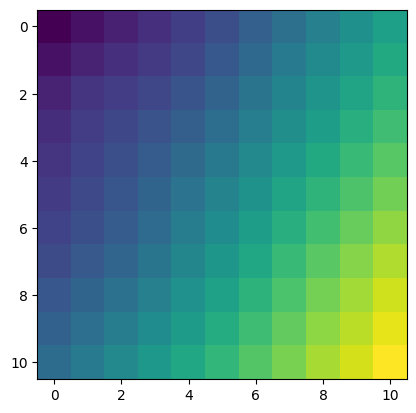

In [6]:
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

#  Ordinary Kriging examples

In [8]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [9]:
x = np.array([-100, 280, -290, 23, 101, 110])
y = np.array([56, 100, 590, 470, 200, 25])
col = np.array([29.3, 21.0, 19.2, 29.1, 21.9, 23.1])

Text(0.5, 1.0, 'Measured Porosity')

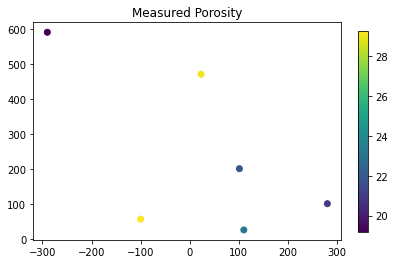

In [10]:
cax = plt.scatter(x, y, c=col)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 25.567123490419227
Full Sill: 25.567124448504348
Range: 308.5698617690029
Nugget: 9.580851190640356e-07 



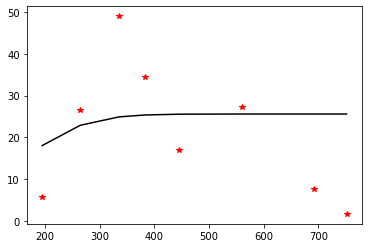

Calculating statistics on variogram model fit...


array([2.55671235e+01, 3.08569862e+02, 9.58085119e-07])

In [13]:
OK = OrdinaryKriging(
    x, 
    y, 
    col, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)
OK.variogram_model_parameters

In [14]:
gridx = np.arange(-300, 300, 10, dtype='float64')
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



Text(0.5, 1.0, 'Porosity estimate')

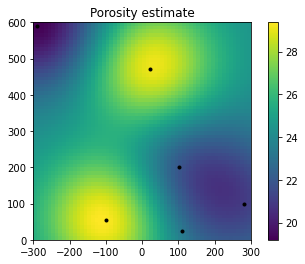

In [15]:
cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

In [20]:
import gstools as gs

data = np.array(
[
[0.3, 1.2, 0.47],
[1.9, 0.6, 0.56],
[1.1, 3.2, 0.74],
[3.3, 4.4, 1.47],
[4.7, 3.8, 1.74],
]
)
# grid definition for output field
gridx = np.arange(0.0, 5.5, 0.1)
gridy = np.arange(0.0, 6.5, 0.1)
# a GSTools based covariance model
cov_model = gs.Gaussian(dim=2, len_scale=4, anis=0.2, angles=-0.5, var=0.5, nugget=0.1)
# ordinary kriging with pykrige
OK1 = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], cov_model)


GSToolsException: GSTools needs to be installed in order to use their CovModel class.

## TUTO avec MEUSE data_set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
import skgstat as skg
warnings.filterwarnings("ignore")

In [7]:
src = skg.data.meuse()
print(src.get('origin'))

Sample dataset of real measurements of heavy metal pollutions
    in the topsoil on a 15x15 meter plot along the river Meuse.
    The data is distributed along with the R-package sp.
    IMPORTANT: If you use this data, cite Pebesma and Bivand (2005)
    and Bivand et al (2013):

      Pebesma EJ, Bivand RS (2005). “Classes and methods for spatial
      data in R.” R News, 5(2), 9–13. https://CRAN.R-project.org/doc/Rnews/.

      Bivand RS, Pebesma E, Gomez-Rubio V (2013). Applied spatial data
      analysis with R, Second edition. Springer, NY. https://asdar-book.org/.

    


In [24]:
coords, vals = src.get('sample')
pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'lead': vals.flatten()})

,x,y,lead
0,181072,333611,299
1,181025,333558,277
2,181165,333537,199
3,181298,333484,116
4,181307,333330,117
...,...,...,...
150,179184,330182,49
151,179085,330292,173
152,178875,330311,119
153,179466,330381,51


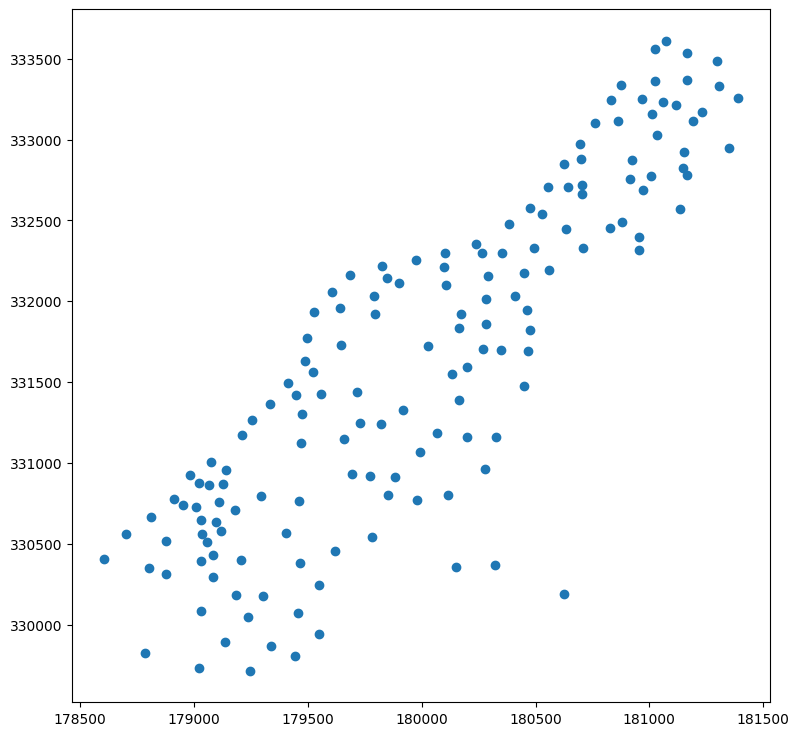

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.scatter(coords[:,0],coords[:,1])

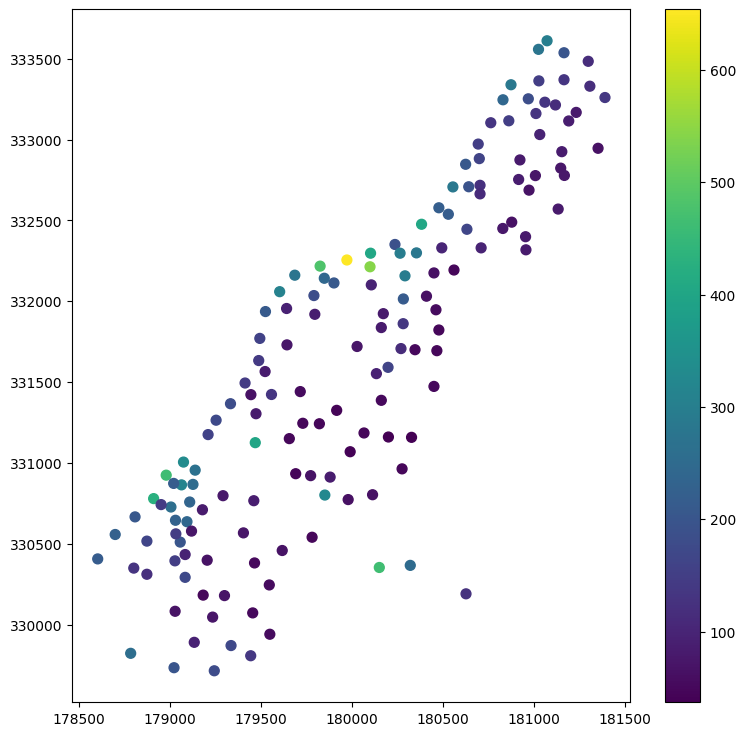

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(coords[:, 0], coords[:, 1], s=50, c=vals.flatten())
plt.colorbar(art)

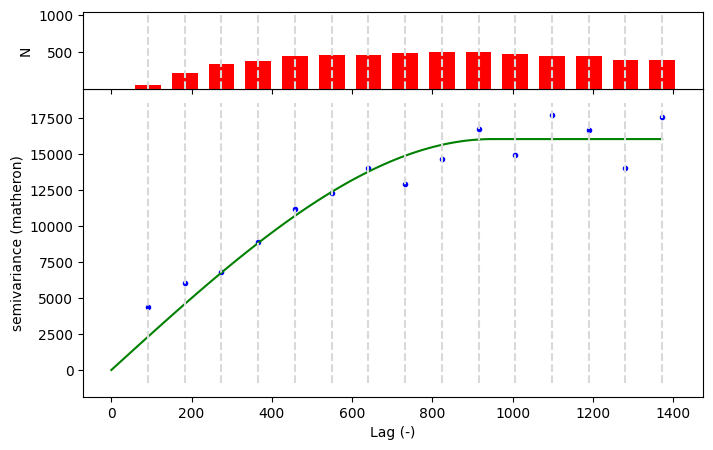

In [19]:
V = skg.Variogram(coords, vals.flatten(), maxlag='median', n_lags=15, normalize=False)
fig = V.plot(show=False)

In [20]:
print('Sample variance: %.2f   Variogram sill: %.2f' % (vals.flatten().var(), V.describe()['sill']))

Sample variance: 12312.20   Variogram sill: 16066.26


In [22]:
ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')
x = coords[:, 0]
y = coords[:, 1]
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

(0.0, 100.0)

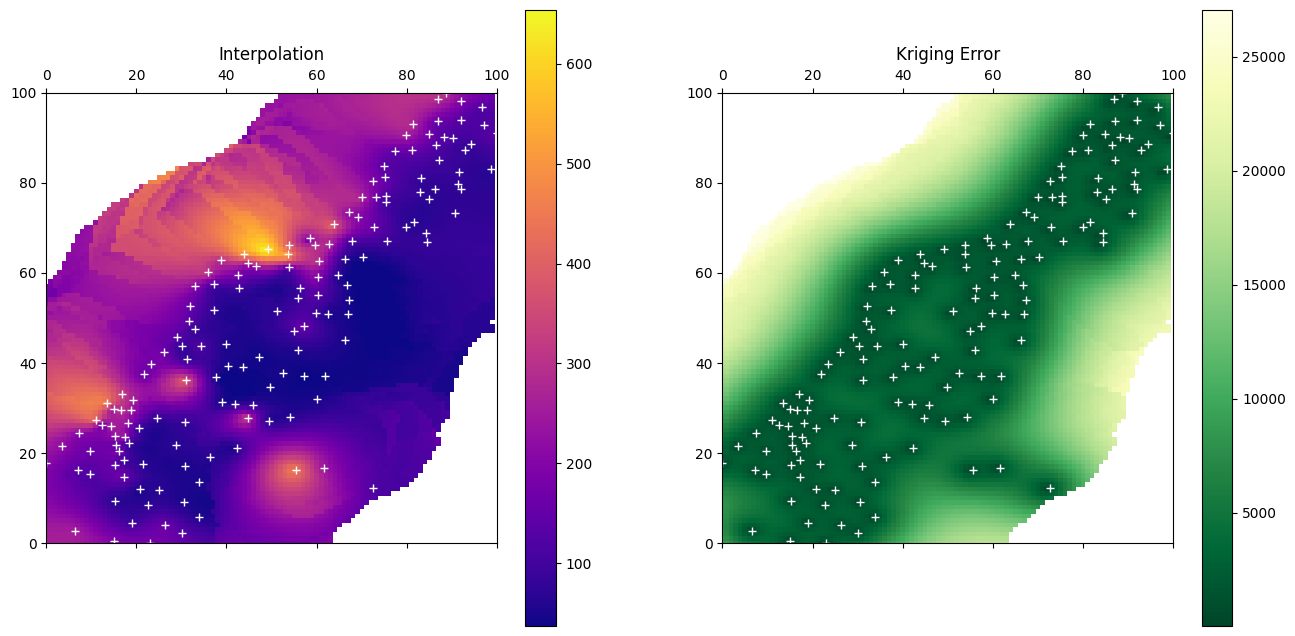

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 100
y_ = (y - y.min()) / (y.max() - y.min()) * 100

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=vals.min(), vmax=vals.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, '+w')
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0, 100))

## TUTO avec données crées

In [6]:
np.random.seed(8)
data = pd.DataFrame(np.random.randint(10, 100,size=(100, 3)), columns=list('xyz'))
data

,x,y,z
0,77,94,15
1,18,93,73
2,58,95,70
3,59,84,37
4,23,19,71
...,...,...,...
95,50,13,42
96,93,79,12
97,71,95,37
98,51,50,13


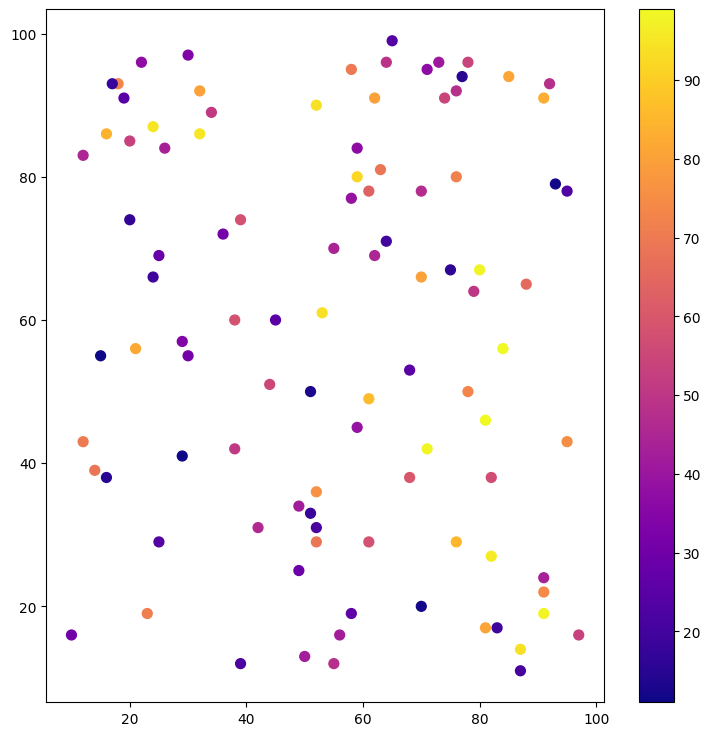

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(data.x,data.y, s=50, c=data.z, cmap='plasma')
plt.colorbar(art)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   14.12
Sill:              714.04
Nugget:            0.00
        


/home/levvint/.local/lib/python3.10/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


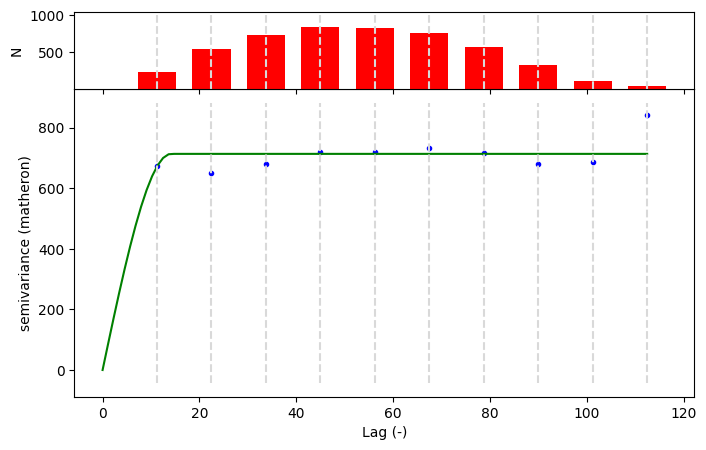

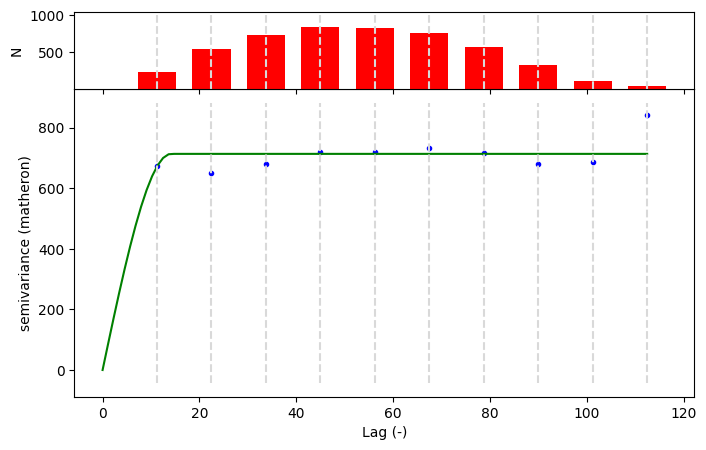

In [8]:
V = skg.Variogram(coordinates=data[['x', 'y']].values, values=data['z'].values)
print(V)
V.plot()

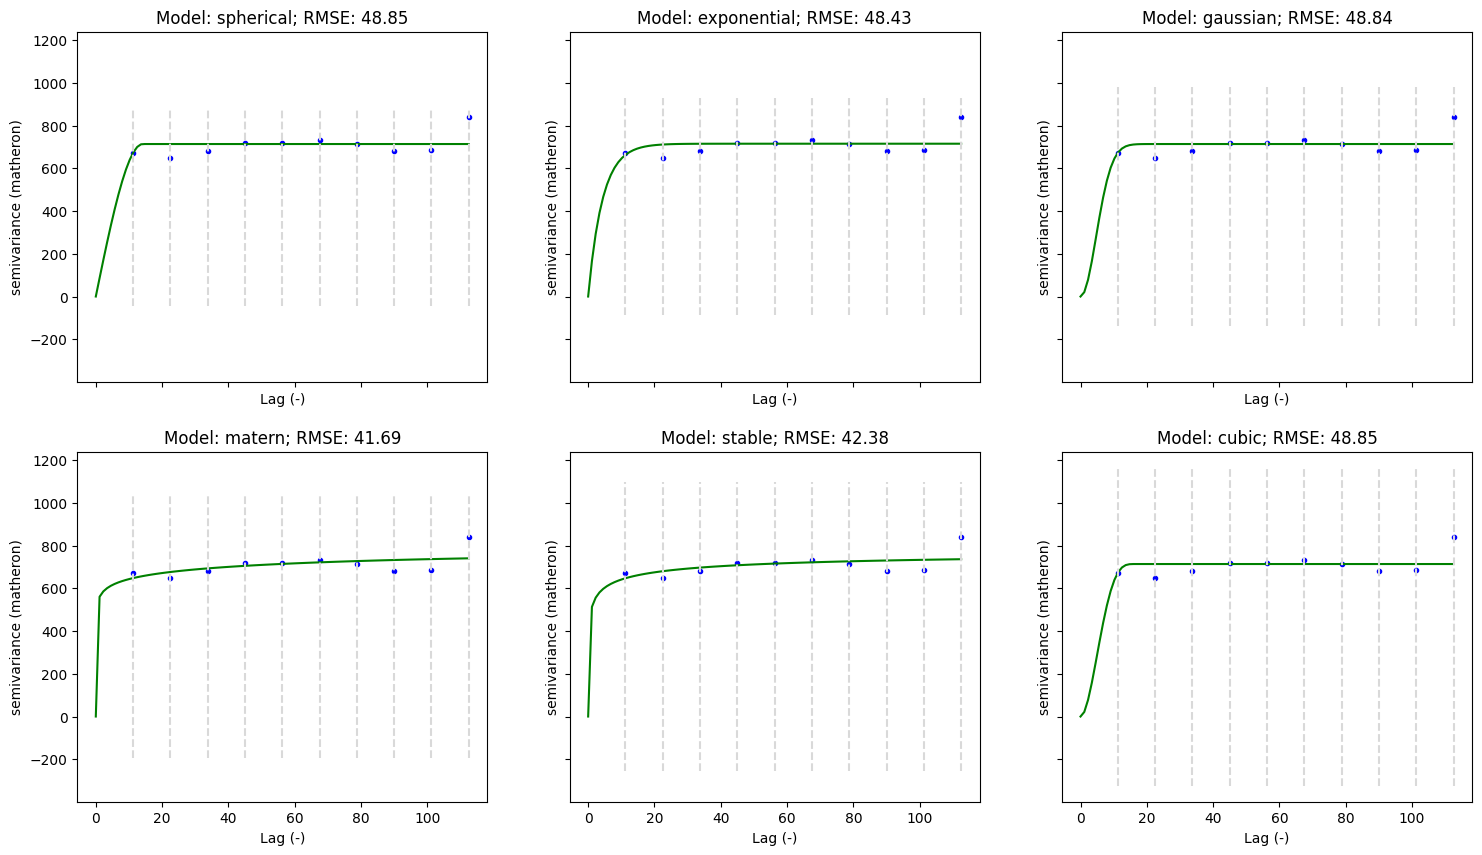

In [9]:
fig, _a = plt.subplots(2,3, figsize=(18, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    V.model = model
    V.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, V.rmse))

/home/levvint/.local/lib/python3.10/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


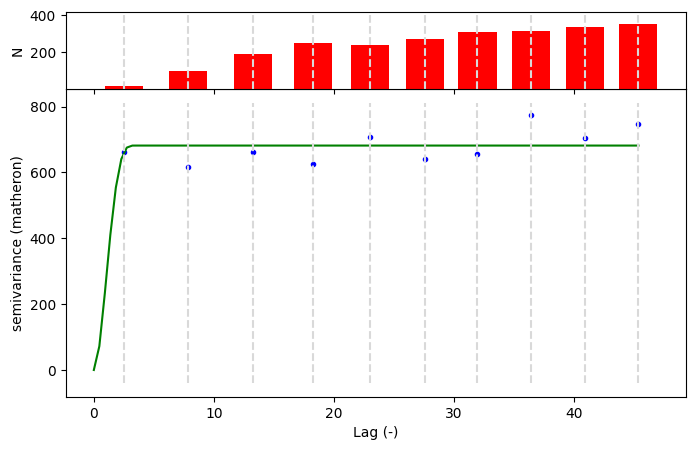

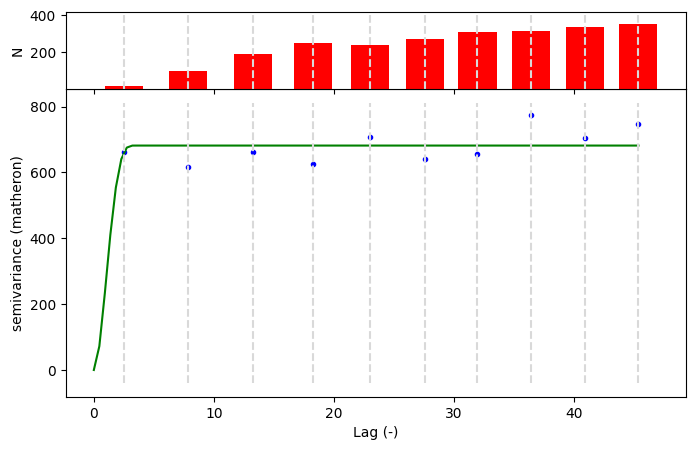

In [10]:
## pas oublié cette cellule pour 
V.n_lags = 10
V.maxlag = 50
V.bin_func = 'kmeans'
V.plot()

(0.0, 100.0)

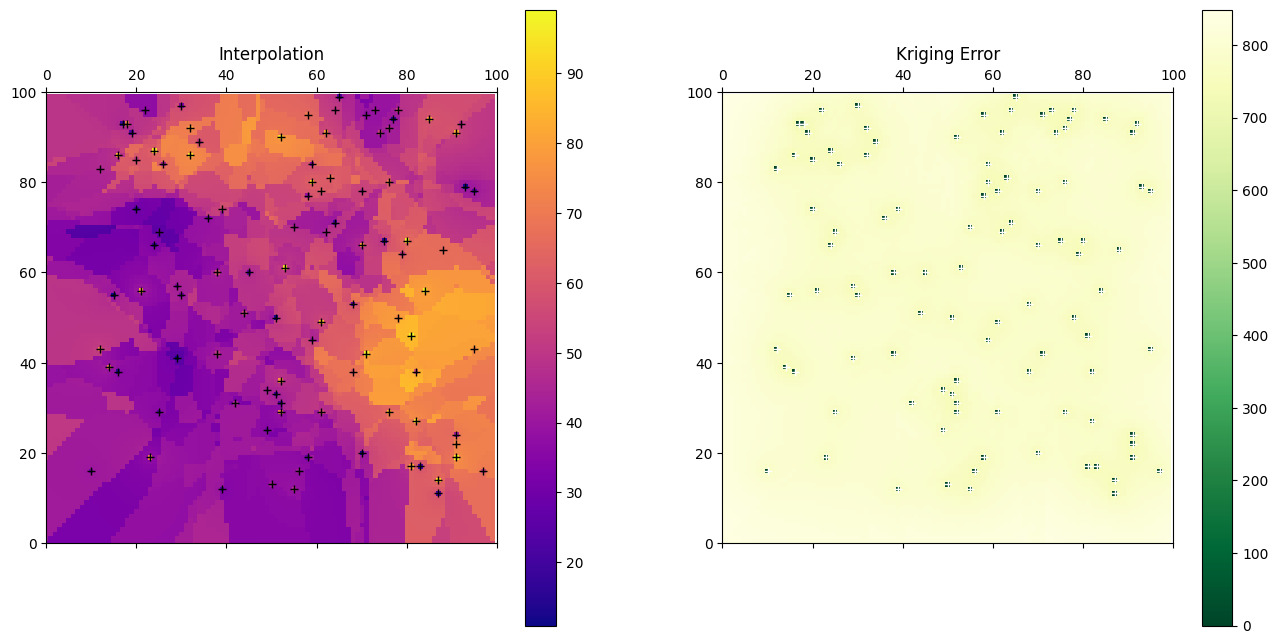

In [11]:
V.model = 'stable'
ok = OrdinaryKriging(V, min_points=3, max_points=5, mode='estimate')

## build the target grid
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

## plot le result
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
art = axes[0].matshow(field.T, origin='lower', cmap='plasma')
axes[0].set_title('Interpolation')
axes[0].plot(data.x, data.y, '+k')
axes[0].set_xlim((0,100))
axes[0].set_ylim((0,100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(data.x, data.y, '+w')
axes[1].set_xlim((0,100))
axes[1].set_ylim((0,100))